In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

d:\harmeet\ML_Oct_2025\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

d:\harmeet\ML_Oct_2025\venv\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

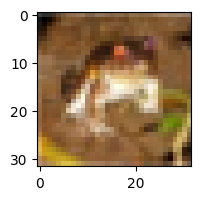

In [6]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

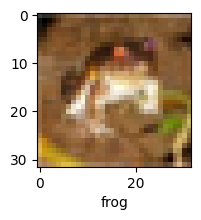

In [13]:
plot_sample(X_train, y_train, 0)

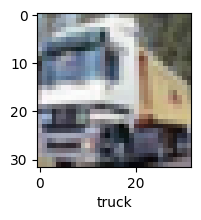

In [14]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [15]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

ANN

In [18]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(128, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.3243 - loss: 1.8669
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.3954 - loss: 1.6987
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4172 - loss: 1.6313
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4382 - loss: 1.5751
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4491 - loss: 1.5392


CNN

In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

d:\harmeet\ML_Oct_2025\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.4731 - loss: 1.4689
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.6102 - loss: 1.1100
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.6566 - loss: 0.9841
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6871 - loss: 0.8975
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7104 - loss: 0.8331
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.7302 - loss: 0.7777
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7470 - loss: 0.7258
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7616 - loss: 0.6860
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7757 - loss: 0.6447
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.7879 - loss: 0.6054


In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


array([[2.91264360e-03, 8.93245626e-04, 1.00535946e-03, 8.71270239e-01,
        4.31892804e-05, 1.06496662e-01, 3.45259812e-03, 2.62911664e-04,
        1.30928308e-02, 5.70432807e-04],
       [1.56198397e-01, 5.18807113e-01, 2.14562215e-06, 1.40420497e-07,
        2.04575969e-07, 1.64783138e-08, 1.23392574e-09, 7.47599103e-08,
        3.21589202e-01, 3.40276840e-03],
       [5.24236038e-02, 6.35598421e-01, 2.03881715e-03, 2.01477902e-03,
        9.20217112e-03, 3.28307948e-03, 3.37907695e-04, 5.33806300e-03,
        9.53041296e-03, 2.80232757e-01],
       [9.13587689e-01, 5.78288138e-02, 1.24920495e-02, 5.18054178e-04,
        8.17164872e-03, 7.32840417e-05, 1.19269796e-04, 7.20492098e-05,
        7.04425713e-03, 9.28339141e-05],
       [3.58497942e-08, 2.22464769e-05, 2.73002535e-02, 5.11205615e-03,
        5.82322478e-01, 1.37234529e-04, 3.85086656e-01, 3.10242012e-06,
        1.59110350e-05, 5.15893603e-08]], dtype=float32)

In [27]:
np.argmax([0.1, 0.7, 0.8])

np.int64(2)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(1), np.int64(1), np.int64(0), np.int64(4)]

In [28]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [1]:
plot_sample(X_test, y_test,1)

NameError: name 'plot_sample' is not defined

In [ ]:
classes[y_classes[1]]

'cat'

In [35]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

d:\harmeet\ML_Oct_2025\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7584 - loss: 0.6896
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7751 - loss: 0.6457
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7881 - loss: 0.6037
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8023 - loss: 0.5673
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8111 - loss: 0.5356
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8250 - loss: 0.5026
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8337 - loss: 0.4718
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.8425 - loss: 0.4438
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8555 - loss: 0.4114
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.8631 - loss: 0.3904
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.8673 - loss: 0.3713
Epoch 1